<a href="https://colab.research.google.com/github/Guiniel/Pasantia-IA-CNTM/blob/main/Pasantia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Configuracion inicial**





**Para iniciar el proyecto debemos realizar un par de instalaciones necesarias para proceder**

In [ ]:
!pip install -q pyyaml h5py
!pip install git+https://github.com/tensorflow/docs

In [ ]:
!pip install pandas openpyxl

**En este fragmento de codigo, se realizan todas las importaciones de librerias necesarias para poder continuar con el trabajo.**

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import seaborn as sns


from sklearn.metrics import mean_squared_error as mse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import joblib
import os


import tensorflow as tf
from tensorflow import keras
from keras import metrics


from keras.models import Sequential, model_from_json, save_model
from keras.layers import *
from keras import optimizers


import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


from keras.callbacks import ModelCheckpoint
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.models import load_model



**Aqui procedemos a cargar el dataset, antes de poder hacerlo tenemos que subirlo al ambiente de google colab y cambiarle el nombre a "dataset.csv"**

In [ ]:
data_pd = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/dataset.csv")
data_pd.head()

,Task_ID,Task_Name,Assignee,Status,Start_Date,Due_Date,Esfuerzo_Aproximado,Time_Estimate,Time_Logged,Año,Q,Mes,Lists
0,86ayu7ehe,ENBOCA2: QA - Ejecución de Pruebas C3,1,COMPLETADO,45321.0,NaN,1.33,8h,8.0,2023,1-24,1.0,Plan / Proyecto Migración a Blog WP - Enboca2
1,86ayu7dpw,ENBOCA2: QA - Ejecución de Pruebas C2,1,COMPLETADO,45309.0,NaN,1.26,8h,6.5,2023,1-24,1.0,Plan / Proyecto Migración a Blog WP - Enboca2
2,86ayrtep7,PWA - Aqustico - Implementación de vista Busca...,1,COMPLETADO,45274.0,45274.0,1.14,4h,4.0,2023,4-23,12.0,Plan Proyecto PWA - Aqustico
3,86ayrtfjw,PWA - Aqustico - Implementación de flujo de ca...,1,COMPLETADO,45273.0,45307.0,1.14,4h,4.0,2023,4-23,12.0,Plan Proyecto PWA - Aqustico
4,86ayjcd29,BB-F2: QA Certificación,1,COMPLETADO,45272.0,45273.0,1.00,1h,1.0,2023,4-23,11.0,FASE 2: Website de Brainbox


**Una buena practica es colocar datos en orden aleatorio para evitar patrones inesperados**

In [ ]:
data_pd_shuffled = data_pd.sample(n=len(data_pd), random_state=1)
data_pd_shuffled

,Task_ID,Task_Name,Assignee,Status,Start_Date,Due_Date,Esfuerzo_Aproximado,Time_Estimate,Time_Logged,Año,Q,Mes,Lists
120,865cp8kn4,Mantenimiento:Actualización ApiUnificado-julio,1,COMPLETADO,45111.0,45138.0,1.56,NaN,12.67,2023,2-23,7.0,Conector
818,865cczuvt,PWA - E2 - AGREGAR FAMILIAR - Ejecución de pru...,2,COMPLETADO,45082.0,45084.0,1.77,NaN,17.25,2023,2-23,5.0,Gestión de QA
90,865cwxmh1,ESMS-SP11: HU41. Certificación con P.O,1,COMPLETADO,45149.0,45149.0,1.02,NaN,1.33,2023,3-23,8.0,Sprint 11: 8/08 al 21/08
228,863fwqz8h,SPRINT 1 -2023. iOS. Generación de builds HU-I...,2,COMPLETADO,44964.0,44965.0,1.02,1h 20m,1.33,2023,1-23,2.0,Sprint 1: 01/02 al 14/02
846,865cdv7t4,SP8: HU-PO0323 Implementación frontend,1,COMPLETADO,45086.0,45099.0,2.76,NaN,38.00,2023,2-23,6.0,Sprint 8: 09/06 al 22/06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,865cdv7up,SP8: HU-PO0323 Backend -Despliegue ambiente QA,1,COMPLETADO,45086.0,45099.0,0.96,NaN,0.08,2023,2-23,6.0,Sprint 8: 09/06 al 22/06
715,865c9vy7t,SP8: HU-PM0323 - Preparación de data para cert...,1,COMPLETADO,45099.0,45099.0,1.07,NaN,2.50,2023,2-23,6.0,Sprint 8: 09/06 al 22/06
905,863gw7cy3,PWA - E3 - MEMBRESIA - Análisis y diseño de c...,1,COMPLETADO,45110.0,45111.0,1.31,7h 30m,7.50,2023,3-23,7.0,Gestión de QA
235,865bkbenz,Crear prototipo high fidelity,1,COMPLETADO,NaN,NaN,1.00,1h,1.00,2023,1-23,1.0,Sprint 1: 01/02 al 14/02


In [ ]:
data_pd_shuffled = data_pd_shuffled.drop(['Task_ID'], axis=1).drop(['Task_Name'], axis=1).drop(['Status'], axis=1).drop(['Start_Date'], axis=1).drop(['Due_Date'], axis=1).drop(['Time_Estimate'], axis=1).drop(['Año'],axis=1).drop(['Lists'], axis=1).drop(['Q '], axis=1)
data_pd_shuffled.head()

,Assignee,Esfuerzo_Aproximado,Time_Logged,Mes
120,1,1.56,12.67,7.0
818,2,1.77,17.25,5.0
90,1,1.02,1.33,8.0
228,2,1.02,1.33,2.0
846,1,2.76,38.00,6.0


In [ ]:
data_pd_shuffled = data_pd_shuffled[['Assignee','Esfuerzo_Aproximado','Mes','Time_Logged']]
data_pd_shuffled

,Assignee,Esfuerzo_Aproximado,Mes,Time_Logged
120,1,1.56,7.0,12.67
818,2,1.77,5.0,17.25
90,1,1.02,8.0,1.33
228,2,1.02,2.0,1.33
846,1,2.76,6.0,38.00
...,...,...,...,...
847,1,0.96,6.0,0.08
715,1,1.07,6.0,2.50
905,1,1.31,7.0,7.50
235,1,1.00,1.0,1.00


**Para poder atacar lo que viene siendo registros vacios, simplemente los eliminamos**

In [ ]:
data_pd_shuffled = data_pd_shuffled.dropna()
len(data_pd_shuffled)
data_pd_shuffled

,Assignee,Esfuerzo_Aproximado,Mes,Time_Logged
120,1,1.56,7.0,12.67
818,2,1.77,5.0,17.25
90,1,1.02,8.0,1.33
228,2,1.02,2.0,1.33
846,1,2.76,6.0,38.00
...,...,...,...,...
847,1,0.96,6.0,0.08
715,1,1.07,6.0,2.50
905,1,1.31,7.0,7.50
235,1,1.00,1.0,1.00


 **Como podemos ver ahora pasamos de 1071 a 1067 registros. solo perdimos 5 registros lo cual no supone ningun problema.
Ahora vamos a hacer la division entre data de entrenamiento y data de test**

In [ ]:
train_pd, test_pd, val_pd = data_pd_shuffled[:900], data_pd_shuffled[900:982], data_pd_shuffled[982:]
len(train_pd), len(test_pd), len (val_pd)

(900, 82, 85)

**Aqui separamos el input del target en cada uno de los conjuntos de entrenamiento, prueba y validacion.**

In [ ]:
X_train, y_train = train_pd.to_numpy()[:,:-1], train_pd.to_numpy()[:,-1]
X_val, y_val = val_pd.to_numpy()[:,:-1], val_pd.to_numpy()[:,-1]
X_test, y_test = test_pd.to_numpy()[:,:-1], test_pd.to_numpy()[:,-1]

X_pd, y_pd = data_pd_shuffled.to_numpy()[:,:-1], data_pd_shuffled.to_numpy()[:,-1]


X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((900, 3), (900,), (85, 3), (85,), (82, 3), (82,))

# **FUNCIONES**

### Grafico de las metricas

In [ ]:
def plot_evaluation_metrics(cv_results):
    # Extraer las métricas de evaluación del conjunto de entrenamiento y de validación
    train_r2_scores = cv_results['train_r2']
    train_mse_scores = -cv_results['train_neg_mean_squared_error']
    train_rmse_scores = -cv_results['train_neg_root_mean_squared_error']

    val_r2_scores = cv_results['test_r2']
    val_mse_scores = -cv_results['test_neg_mean_squared_error']
    val_rmse_scores = -cv_results['test_neg_root_mean_squared_error']

    # Calcular las medias de las métricas de evaluación para cada conjunto
    mean_train_r2 = np.mean(train_r2_scores)
    mean_train_mse = np.mean(train_mse_scores)
    mean_train_rmse = np.mean(train_rmse_scores)

    mean_val_r2 = np.mean(val_r2_scores)
    mean_val_mse = np.mean(val_mse_scores)
    mean_val_rmse = np.mean(val_rmse_scores)

    # Crear listas con las métricas y sus valores correspondientes para el gráfico
    metrics = ['R2', 'MSE', 'RMSE']
    train_scores = [mean_train_r2, mean_train_mse, mean_train_rmse]
    val_scores = [mean_val_r2, mean_val_mse, mean_val_rmse]

    # Configurar las posiciones de las barras en el gráfico
    x = np.arange(len(metrics))

    # Configurar el ancho de las barras
    width = 0.35

    # Crear el gráfico de barras
    fig, ax = plt.subplots()
    bars1 = ax.bar(x - width/2, train_scores, width, label='Train')
    bars2 = ax.bar(x + width/2, val_scores, width, label='Validation')

    # Añadir etiquetas y título al gráfico
    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Comparison of Evaluation Metrics')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()


    plt.show()

### **Grafico curva de aprendizaje**

In [ ]:
def plot_learning_curve(X_train, cv_results, title):
    total_samples = len(X_train)
    train_sizes = np.arange(0.1, 1.1, 0.1) * total_samples
    train_errors = -cv_results['train_neg_mean_squared_error'].reshape(-1, 10).mean(axis=0)
    val_errors = -cv_results['test_neg_mean_squared_error'].reshape(-1, 10).mean(axis=0)

    print(-cv_results['train_neg_mean_squared_error'])
    plt.plot(train_sizes, train_errors, label='Train')
    plt.plot(train_sizes, val_errors, label='Validation')
    plt.xlabel('Training Size')
    plt.ylabel('MSE')
    plt.title(title)
    plt.legend()
    plt.show()

### **Funcion para guardar los resultados de mis modelos no neuronales**

In [ ]:
def saveNonNeuronalModelResults(hist, path):
  hist = hist.drop(['fit_time', 'score_time'], axis=1)
  hist = abs(hist)
  numeric_columns = hist.select_dtypes(include=['float64', 'int64'])
  hist[numeric_columns.columns] = numeric_columns.round(4)
  hist = hist.rename(columns={'test_neg_mean_squared_error':'test_mse', 'train_neg_mean_squared_error':'train_mse', 'test_neg_mean_absolute_error':'test_mae','train_neg_mean_absolute_error':'train_mae',
                            'train_neg_mean_absolute_percentage_error':'train_mape','test_neg_mean_absolute_percentage_error':'test_mape', 'test_neg_root_mean_squared_error':'test_rmse',
                            'train_neg_root_mean_squared_error':'train_rmse'})
  hist.to_excel(path, index=False)

### **Funcion para 2 metricas personalizadas**

In [ ]:
def median_relative_error(y_true, y_pred):
    error = tf.math.abs(y_true - y_pred) / tf.maximum(tf.math.abs(y_true), 1e-7)
    return tf.keras.backend.mean(error)

def r_squared(y_true, y_pred):
    SS_res =  tf.reduce_sum(tf.square(y_true - y_pred))
    SS_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))
    return 1 - SS_res/(SS_tot + tf.keras.backend.epsilon())



### **Funciones para mi construccion de mis modelos neuronales**

In [ ]:
def build_model1_two_hidden_layers():
    model = Sequential()
    model.add(Dense(10, input_shape = (X_train.shape[1],)))
    model.add(Dense(50,activation = 'relu'))
    model.add(Dense(50,activation = 'relu'))
    model.add(Dense(1))
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[metrics.mean_absolute_error, metrics.mean_squared_error, metrics.mean_absolute_percentage_error, median_relative_error, r_squared]) # for regression problems, mean squared error (MSE) is often employed

    return model

def build_model2_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_shape = (X_train.shape[1],)))    # La primera es la capa de entrada y el resto son escondidas
    model.add(Dense(32,activation = 'relu'))
    model.add(Dense(64, activation = 'relu'))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64)
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1))
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[metrics.mean_absolute_error, metrics.mean_squared_error, metrics.mean_absolute_percentage_error, median_relative_error, r_squared])
    return model

def build_model3_five_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_shape = (X_train.shape[1],)))    # Input layer => input_shape must be explicitly designated
    model.add(Dense(64, activation = 'relu'))                         # Hidden layer 1 => only output dimension should be designated (output dimension = # of Neurons = 64)
    model.add(Dense(64, activation = 'relu'))                         # Hidden layer 2 => only output dimension should be designated (output dimension = # of Neurons = 64
    model.add(Dense(64, activation = 'relu'))                         # Hidden layer 3 => only output dimension should be designated (output dimension = # of Neurons = 64)
    model.add(Dense(64, activation = 'relu'))                         # Hidden layer 4 => only output dimension should be designated (output dimension = # of Neurons = 64)
    model.add(Dense(64, activation = 'relu'))                         # Hidden layer 5 => only output dimension should be designated (output dimension = # of Neurons = 64)
    model.add(Dense(1))                          # Output layer => output dimension = 1 since it is a regression problem

    # Activation: sigmoid, softmax, tanh, relu, LeakyReLU.
    #Optimizer: SGD, Adam, RMSProp, etc. # https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
    learning_rate = 0.0001
    optimizer = optimizers.Adam(learning_rate)
    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=[metrics.mean_absolute_error, metrics.mean_squared_error, metrics.mean_absolute_percentage_error, median_relative_error, r_squared]) # for regression problems, mean squared error (MSE) is often employed

    return model

### **Funcion para guardar mis predicciones**

In [ ]:
def savePredictionVsReal(model,X,y,path):
  prediction = model.predict(X).flatten()
  columnas = ['Assigned','Esfuerzo_Aproximado','Mes','Real','Prediccion','Diferencia']
  tabla = pd.DataFrame(columns = columnas)
  tabla[['Assigned','Esfuerzo_Aproximado','Mes']] = X
  tabla['Real'] = y
  tabla['Prediccion'] = prediction
  tabla['Diferencia'] = tabla['Prediccion'] - tabla['Real']
  tabla.to_excel(path, index=False)

### **Funcion para guardar mis resultados de mis modelos neuronales**

In [ ]:
def saveNeuronalModelResults(hist, path):
  hist= hist.round(4)
  hist = hist.rename(columns={'loss':'mse', 'mean_absolute_error':'mae', 'mean_absolute_percentage_error':'mape',
                            'median_relative_error':'mre',
                            'r_squared':'r2','val_loss':'v_mse', 'val_mean_absolute_error':'v_mae',
                            'val_mean_absolute_percentage_error':'v_mape','val_median_relative_error':'v_mre','val_r_squared': 'v_r2'})
  hist = hist.drop(['mean_squared_error'], axis = 1).drop(['val_mean_squared_error'], axis = 1)
  hist.to_excel(path, index=False)

# **KNEIGHBORS REGRESSOR**

In [ ]:
knr_cv = KNeighborsRegressor(n_neighbors=3)
kf = KFold(n_splits=10)
cv_results_knr = cross_validate(knr_cv, X_train, y_train, cv = kf, return_train_score = True, scoring = ('r2','neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error','neg_root_mean_squared_error'))

# Guardo los resultados del entrenamiento en un dataframe
hist = pd.DataFrame(cv_results_knr)

# Exporto los resultados a un excel
saveNonNeuronalModelResults(hist,'knr_metrics_results.xlsx')

# Entreno con todo el conjunto de datos
knr = KNeighborsRegressor(n_neighbors=3).fit(X_pd,y_pd)

# Guardo mis predicciones vs mis valores reales
savePredictionVsReal(knr, X_pd, y_pd, 'knr_prediction_real.xlsx' )

# Guardo el modelo para posterior uso
joblib.dump(knr, '/content/drive/MyDrive/Colab Notebooks/modelos/knr_trained.pkl')

['/content/drive/MyDrive/Colab Notebooks/modelos/knr_trained.pkl']

### **Curva de entrenamiento**

[1.95993524 2.48420616 2.46572412 2.57081294 2.18566741 2.57016355
 2.6327138  2.45219073 3.55254573 2.40808195]


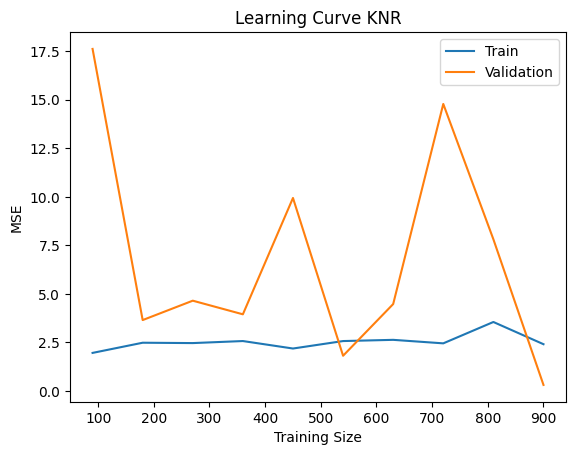

In [ ]:
plot_learning_curve(X_train, cv_results_knr, 'Learning Curve KNR')



# **RANDOM FOREST REGRESSOR**



### **Imports y entrenamiento**

In [ ]:
rfrcv = RandomForestRegressor(n_estimators=10, max_depth=6, random_state=0)
kf = KFold(n_splits=10)
cv_results_rfr = cross_validate(rfrcv, X_train, y_train, cv = kf, return_estimator = False, return_train_score = True, scoring = ('r2','neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error','neg_root_mean_squared_error'))

# Guardo los resultados del entrenamiento en un dataframe
hist = pd.DataFrame(cv_results_rfr)

# Exporto los resultados a un excel
saveNonNeuronalModelResults(hist,'rfr_metrics_results.xlsx')

# Entreno con todo el conjunto de datos
rfr = RandomForestRegressor(n_estimators=10, max_depth=6, min_samples_split=2, random_state=0).fit(X_pd, y_pd)

# Guardo mis predicciones vs mis valores reales
savePredictionVsReal(rfr, X_pd, y_pd, 'rfr_prediction_real.xlsx' )

# Guardo el modelo para posterior uso
joblib.dump(rfr, '/content/drive/MyDrive/Colab Notebooks/modelos/rfr_trained.pkl')

['/content/drive/MyDrive/Colab Notebooks/modelos/rfr_trained.pkl']

### **Curva de entrenamiento**

[0.00091641 0.00125135 0.00098111 0.00101418 0.00110666 0.00099005
 0.00089949 0.00100068 0.00106436 0.0010296 ]


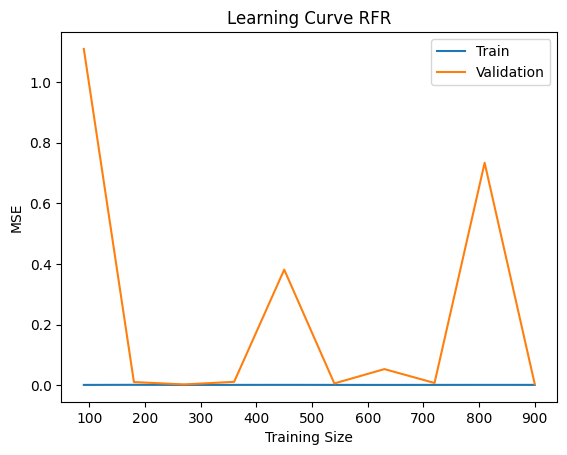

In [ ]:
plot_learning_curve(X_train, cv_results_gbr, 'Learning Curve RFR')

# **GRADIENT BOOSTING REGRESSOR**

### **Imports y entrenamiento**

In [ ]:
gbrcv = GradientBoostingRegressor(n_estimators=100, min_samples_split = 2, max_depth = 3, random_state = 0)
kf = KFold(n_splits = 10)
cv_results_gbr = cross_validate(gbrcv, X_train, y_train, cv = kf, return_train_score = True, scoring = ('r2','neg_mean_squared_error','neg_mean_absolute_error','neg_mean_absolute_percentage_error','neg_root_mean_squared_error'))

# Guardo los resultados del entrenamiento en un dataframe
hist = pd.DataFrame(cv_results_gbr)

# Exporto los resultados a un excel
saveNonNeuronalModelResults(hist,'gbr_metrics_results.xlsx')

# Entreno con todo el conjunto de datos
gbr = GradientBoostingRegressor(n_estimators=100, min_samples_split = 2, max_depth = 3, random_state = 0).fit(X_pd, y_pd)

# Guardo mis predicciones vs mis valores reales
savePredictionVsReal(gbr, X_pd, y_pd, 'gbr_prediction_real.xlsx' )

# Guardo el modelo para posterior uso
joblib.dump(gbr, '/content/drive/MyDrive/Colab Notebooks/modelos/gbr_trained.pkl')

['/content/drive/MyDrive/Colab Notebooks/modelos/gbr_trained.pkl']

### **Curva de entrenamiento**

[0.11068014 0.11041269 0.1233487  0.09747296 0.09369162 0.0690961
 0.08396959 0.08934128 0.18399155 0.05580003]


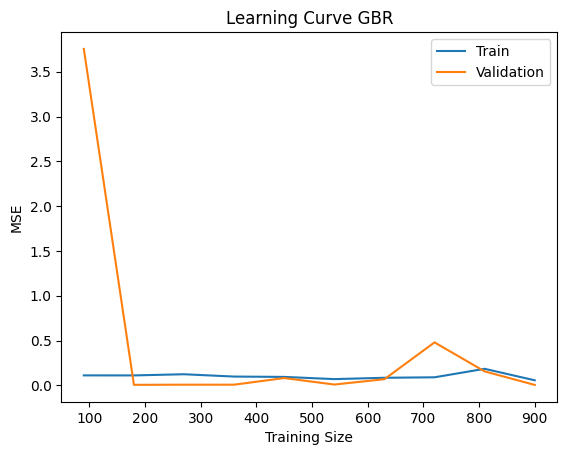

In [ ]:
plot_learning_curve(X_train, cv_results_rfr, 'Learning Curve GBR')

# **RED NEURONAL**

In [ ]:
# Aqui hacemos el entrenamiento normal, es igual a lo que se hace posteriormente. Este metodo es llamado hold out cv
%%time
EPOCHS = 500
batch_size = 32

model = build_model2_three_hidden_layers()
print('Sumary: ')
model.summary()
with tf.device('/CPU:0'):
    history = model.fit(
        X_train,
        y_train,
        batch_size = batch_size,
        epochs=EPOCHS,
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(X_train.shape[0] / batch_size) ,
        validation_data = (X_val, y_val),
        callbacks=[tfdocs.modeling.EpochDots()]
    )

Sumary: 
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 128)               8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11745 (45.88 KB)
Trainable params: 11745 (45.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch: 0, 

In [ ]:
print('Summary after each epoch: ')
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

Summary after each epoch: 


,loss,mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,median_relative_error,r_squared,val_loss,val_mean_absolute_error,val_mean_squared_error,val_mean_absolute_percentage_error,val_median_relative_error,val_r_squared,epoch
495,0.004124,0.053732,0.004124,4.701680,0.046107,0.999831,0.006049,0.059417,0.006049,4.974282,0.053697,0.999874,495
496,0.004391,0.055064,0.004391,4.609173,0.045124,0.999881,0.007450,0.063560,0.007450,4.606899,0.047951,0.999814,496
497,0.004908,0.057450,0.004908,4.884690,0.048616,0.999846,0.006643,0.062952,0.006643,6.168103,0.066872,0.999845,497
498,0.006062,0.062842,0.006062,5.958009,0.059020,0.999770,0.007827,0.063230,0.007827,4.347600,0.045476,0.999839,498
499,0.004446,0.055830,0.004446,4.683346,0.045713,0.999855,0.005673,0.058798,0.005673,4.695039,0.050360,0.999873,499


Text(0, 0.5, 'MAE [Time_Logged]')

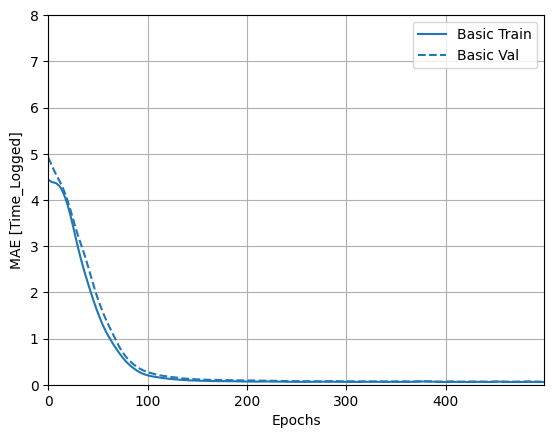

In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = 'mean_absolute_error')
plt.ylim([0, 8])
plt.ylabel('MAE [Time_Logged]')

Text(0, 0.5, 'MSE [medv^2]')

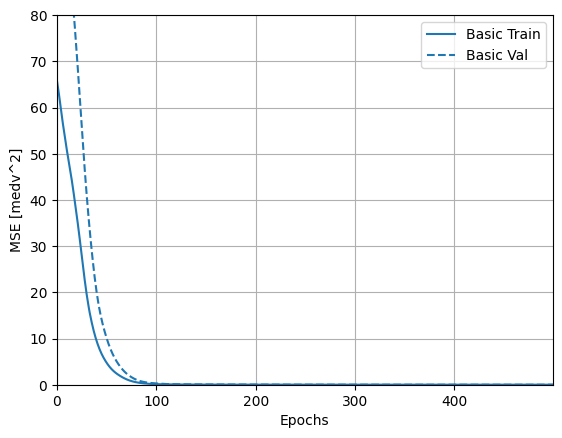

In [ ]:
plotter.plot({'Basic': history}, metric = "mean_squared_error")
plt.ylim([0, 80])
plt.ylabel('MSE [medv^2]')

29/29 [==============================] - 0s 1ms/step


array([ 1.27722912e+01,  1.72105579e+01,  1.40331042e+00,  1.40677106e+00,
        3.79701538e+01,  3.92542028e+00,  4.97658110e+00,  4.55543184e+00,
        3.10821486e+00,  7.49746990e+00,  5.75190365e-01,  2.44448757e+00,
        1.40789022e+01,  1.59930267e+01,  4.95982122e+00,  8.56612301e+00,
        1.02503729e+01,  3.09581375e+00,  9.85868275e-01,  3.07784438e+00,
        3.06400013e+00,  1.19295368e+01,  3.92771935e+00,  1.99092407e+01,
        5.76655090e-01,  9.77211654e-01,  3.09581375e+00,  2.47135091e+00,
        5.75190365e-01,  7.69907227e+01,  3.94555926e+00,  1.57002678e+01,
        2.02715731e+00,  3.58154267e-01,  5.67549169e-01,  2.11407299e+01,
        7.91884661e+00,  9.77211654e-01,  1.39643133e+00,  3.58154267e-01,
        9.81327593e-01,  3.09663486e+00,  3.10821486e+00,  1.84532890e+01,
        1.90525379e+01,  1.04471130e+01,  3.58154267e-01,  1.60024017e-01,
        3.14984894e+01,  2.05779284e-01,  5.41339159e+00,  3.07160378e+00,
        5.66144049e-01,  

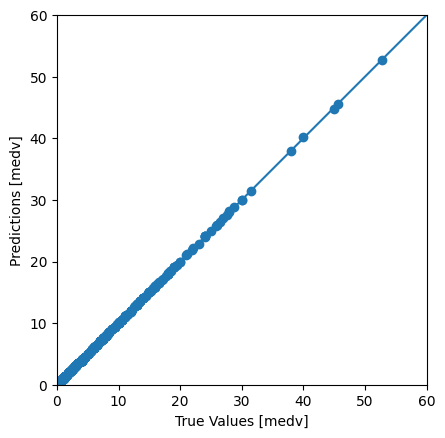

In [ ]:
train_predictions = model.predict(X_train).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_train, train_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
train_predictions

3/3 [==============================] - 0s 3ms/step


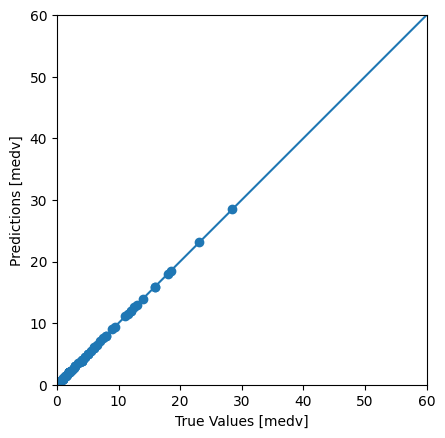

In [ ]:
test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [medv]')
plt.ylabel('Predictions [medv]')
lims = [0, 60]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

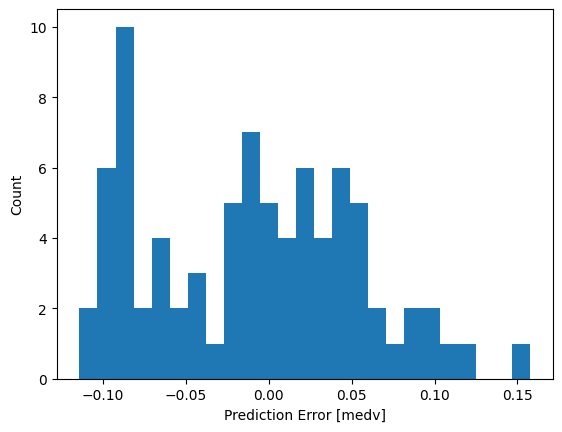

In [ ]:
# error distribution.
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [medv]")
_ = plt.ylabel("Count")

In [ ]:
def neural_network_training_cv(n_folds, size, model_function):
  kf = KFold(n_splits=n_folds)
  histories = []
  loss_per_fold = []
  mae_per_fold = []
  mape_per_fold = []
  accuracy_per_fold = []
  r2_per_fold = []
  inputs = np.concatenate((X_train, X_val), axis = 0)
  targets = np.concatenate((y_train, y_val), axis = 0)
  n_splits =1

  for train, test in kf.split(inputs, targets):
    # Crea un nuevo modelo para este pliegue
    if model_function == 1:
      model = build_model1_two_hidden_layers()
    elif model_function == 2:
      model = build_model2_three_hidden_layers()
    elif model_function == 3:
      model = build_model3_five_hidden_layers()
    print('------------------------------------------------------------------------')
    print(f'Entrenando para el pliegue {n_splits} ...')
    # Entrena el modelo en los datos de entrenamiento de este pliegue
    history = model.fit(inputs[train], targets[train], epochs=200, batch_size=size, verbose=0, shuffle=True, steps_per_epoch = int(X_train.shape[0] / size) ,
        validation_data = (X_val, y_val) )

    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist['pliego'] = n_splits
    histories.append(hist)

    scores = model.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Puntaje por pliegue {n_splits}: Loss(MSE) de {scores[0]:.4f}; MAE de {scores[1]:.4f}; MAPE de {scores[3]:.4f}; Precision de {(1-scores[4])*100:.4f}%; R2 de {scores[5]:.4f}')
    loss_per_fold.append(scores[0])
    mae_per_fold.append(scores[1])
    mape_per_fold.append(scores[3])
    accuracy_per_fold.append((1-scores[4])*100)
    r2_per_fold.append(scores[5])
    n_splits = n_splits + 1

  print('------------------------------------------------------------------------')
  print('Puntaje por pliegue')
  for i in range(0, len(loss_per_fold)):
    print('------------------------------------------------------------------------')
    print(f'> Pliegue {i+1} - Loss (mse): {loss_per_fold[i]:.4f} - MAE: {mae_per_fold[i]:.4f} - MAPE: {mape_per_fold[i]:.4f} - Precision: {(accuracy_per_fold[i]):.4f}% - R2: {r2_per_fold[i]:.4f}')
  print('------------------------------------------------------------------------')
  print('Promedio entre todos los pliegues:')
  print(f'> Loss: {np.mean(loss_per_fold):.4f}')
  print(f'> MAE: {np.mean(mae_per_fold):.4f}')
  print(f'> MAPE: {np.mean(mape_per_fold):.4f}')
  print(f'> Precision: {(np.mean(accuracy_per_fold)):.4f}%')
  print(f'> R2: {np.mean(r2_per_fold):.4f}')
  print('------------------------------------------------------------------------')

  if model_function == 1:
    resumen_1 = pd.concat(histories, ignore_index=True)
    return resumen_1
  elif model_function == 2:
    resumen_2 = pd.concat(histories, ignore_index=True)
    return resumen_2
  elif model_function == 3:
    resumen_3 = pd.concat(histories, ignore_index=True)
    return resumen_3

In [ ]:
# Resultado para modelo de 2 capas
hist = neural_network_training_cv(10, 32, 1)

# Guardo los resultados del entrenamiento en un dataframe
results = pd.DataFrame(hist)

## Guardamos los resultados del modelo
saveNeuronalModelResults(results,'nn2_metrics_results.xlsx')

# Entrenamos el modelo alcanzado con
model = build_model1_two_hidden_layers()
with tf.device('/CPU:0'):
    model.fit(
        X_pd,
        y_pd,
        batch_size = 32,
        epochs=200,
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(X_pd.shape[0] / 32) ,
        callbacks=[tfdocs.modeling.EpochDots()]
    )

# Guardamos las predicciones con el modelo recien compilado
savePredictionVsReal(model, X_pd, y_pd, 'nn2_prediction_real.xlsx' )

# Guardamos los pesos del modelo
# serialize model to JSON
model.save('/content/drive/MyDrive/Colab Notebooks/modelos/nn2_trained.h5')

------------------------------------------------------------------------
Entrenando para el pliegue 1 ...
Puntaje por pliegue 1: Loss(MSE) de 0.6494; MAE de 0.2646; MAPE de 13.6961; Precision de 84.4443%; R2 de 0.9909
------------------------------------------------------------------------
Entrenando para el pliegue 2 ...
Puntaje por pliegue 2: Loss(MSE) de 0.0753; MAE de 0.2011; MAPE de 18.2209; Precision de 81.9363%; R2 de 0.9952
------------------------------------------------------------------------
Entrenando para el pliegue 3 ...
Puntaje por pliegue 3: Loss(MSE) de 0.0617; MAE de 0.1605; MAPE de 14.8839; Precision de 85.0317%; R2 de 0.9964
------------------------------------------------------------------------
Entrenando para el pliegue 4 ...
Puntaje por pliegue 4: Loss(MSE) de 0.0180; MAE de 0.1043; MAPE de 8.8501; Precision de 90.5467%; R2 de 0.9992
------------------------------------------------------------------------
Entrenando para el pliegue 5 ...
Puntaje por pliegue 5: 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Resultado para modelo de 3 capas

hist= neural_network_training_cv(10, 32, 2 )

# Guardo los resultados del entrenamiento en un dataframe
hist = pd.DataFrame(hist)

## Guardamos los resultados del modelo
saveNeuronalModelResults(hist,'nn3_metrics_results.xlsx')

# Entrenamos el modelo alcanzado con
model = build_model2_three_hidden_layers()
with tf.device('/CPU:0'):
    model.fit(
        X_pd,
        y_pd,
        batch_size = 32,
        epochs=200,
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(X_pd.shape[0] / 32) ,
        callbacks=[tfdocs.modeling.EpochDots()]
    )

# Guardamos las predicciones con el modelo recien compilado
savePredictionVsReal(model, X_pd, y_pd, 'nn3_prediction_real.xlsx')

# Guardamos los pesos del modelo
model.save('/content/drive/MyDrive/Colab Notebooks/modelos/nn3_trained.h5')


------------------------------------------------------------------------
Entrenando para el pliegue 1 ...
Puntaje por pliegue 1: Loss(MSE) de 0.1951; MAE de 0.0964; MAPE de 3.5838; Precision de 96.1326%; R2 de 0.9984
------------------------------------------------------------------------
Entrenando para el pliegue 2 ...
Puntaje por pliegue 2: Loss(MSE) de 0.0117; MAE de 0.0752; MAPE de 6.1694; Precision de 93.4345%; R2 de 0.9990
------------------------------------------------------------------------
Entrenando para el pliegue 3 ...
Puntaje por pliegue 3: Loss(MSE) de 0.0047; MAE de 0.0555; MAPE de 5.6308; Precision de 94.3088%; R2 de 0.9995
------------------------------------------------------------------------
Entrenando para el pliegue 4 ...
Puntaje por pliegue 4: Loss(MSE) de 0.0059; MAE de 0.0619; MAPE de 7.0616; Precision de 93.8817%; R2 de 0.9998
------------------------------------------------------------------------
Entrenando para el pliegue 5 ...
Puntaje por pliegue 5: Los

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Resultado para modelo de 5 capas

resumen_3 = neural_network_training_cv(10, 32, 3)

# Guardo los resultados del entrenamiento en un dataframe
hist = pd.DataFrame(hist)

## Guardamos los resultados del modelo
saveNeuronalModelResults(hist,'nn5_metrics_results.xlsx')

# Entrenamos el modelo alcanzado con
model = build_model3_five_hidden_layers()
with tf.device('/CPU:0'):
    model.fit(
        X_pd,
        y_pd,
        batch_size = 32,
        epochs=200,
        verbose=0,
        shuffle=True,
        steps_per_epoch = int(X_pd.shape[0] / 32) ,
        callbacks=[tfdocs.modeling.EpochDots()]
    )

# Guardamos las predicciones con el modelo recien compilado
savePredictionVsReal(model, X_pd, y_pd, 'nn5_prediction_real.xlsx')

# Guardamos los pesos del modelo
model.save('/content/drive/MyDrive/Colab Notebooks/modelos/nn5_trained.h5')

------------------------------------------------------------------------
Entrenando para el pliegue 1 ...
Puntaje por pliegue 1: Loss(MSE) de 0.0363; MAE de 0.0876; MAPE de 5.3905; Precision de 94.2347%; R2 de 0.9986
------------------------------------------------------------------------
Entrenando para el pliegue 2 ...
Puntaje por pliegue 2: Loss(MSE) de 0.0317; MAE de 0.1332; MAPE de 9.8164; Precision de 89.0485%; R2 de 0.9972
------------------------------------------------------------------------
Entrenando para el pliegue 3 ...
Puntaje por pliegue 3: Loss(MSE) de 0.0210; MAE de 0.1288; MAPE de 13.9972; Precision de 87.4930%; R2 de 0.9979
------------------------------------------------------------------------
Entrenando para el pliegue 4 ...
Puntaje por pliegue 4: Loss(MSE) de 0.0061; MAE de 0.0664; MAPE de 6.0648; Precision de 94.6025%; R2 de 0.9998
------------------------------------------------------------------------
Entrenando para el pliegue 5 ...
Puntaje por pliegue 5: Lo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Junto los excel en un solo archivo pero en diferentes hojas**

In [ ]:
nombres_archivos = ['knr_metrics_results.xlsx', 'knr_prediction_real.xlsx',
                    'rfr_metrics_results.xlsx', 'rfr_prediction_real.xlsx',
                    'gbr_metrics_results.xlsx', 'gbr_prediction_real.xlsx',
                    'nn2_metrics_results.xlsx', 'nn2_prediction_real.xlsx',
                    'nn3_metrics_results.xlsx', 'nn3_prediction_real.xlsx',
                    'nn5_metrics_results.xlsx', 'nn5_prediction_real.xlsx',]

with pd.ExcelWriter('archivo_combinado.xlsx') as writer:
    for nombre_archivo in nombres_archivos:
        # Leer el archivo Excel en un DataFrame
        df = pd.read_excel(nombre_archivo)

        # Obtener el nombre de la hoja del archivo Excel
        nombre_hoja = nombre_archivo.split('.')[0]

        # Escribir el DataFrame en una hoja del archivo combinado
        df.to_excel(writer, sheet_name=nombre_hoja, index=False)